In [1]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import folium
import json
import requests

In [34]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)

In [5]:
def kmtodegree(v):
    d = v / 111.19
    return d

In [6]:
def saveNearbyVenues(location, radius=1000):
    lat, lng = location
    file_name = '{}_{}.json'.format(lat, lng)
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        lng, 
        radius, 
        LIMIT)
            
    # make the GET request
    results = requests.get(url).json()
    with open(file_name, 'w') as file:
        json.dump(results, file)

In [7]:
def get_coordinates(address):
    geolocator = Nominatim(user_agent='business_recommender')
    return geolocator.geocode(address)[1]

In [8]:
def get_city(coordinates):
    geolocator = Nominatim(user_agent='business_recommender')
    data = geolocator.reverse(coordinates)
    try: 
        data = data.raw
        try:
            coordinates_city = data['address']['city']
        except: 
            coordinates_city = data['address']['town']
        return coordinates_city
    except:
        print("unable find {} city.".format(coordinates))

In [9]:
CLIENT_ID = 'WKEAMU3UJHNQO1IV0C0FKNFFXPVRPUGXAP2FPZ4EJLTBIYYG' # your Foursquare ID
CLIENT_SECRET = 'A1OYH5W0HWEUK2VXPGG2CUUAXNLSX4KZ4ZQTGKJE4OC30R3C' # your Foursquare Secret
VERSION = '20210101' # Foursquare API version
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WKEAMU3UJHNQO1IV0C0FKNFFXPVRPUGXAP2FPZ4EJLTBIYYG
CLIENT_SECRET:A1OYH5W0HWEUK2VXPGG2CUUAXNLSX4KZ4ZQTGKJE4OC30R3C


In [10]:
venue_category = 'Theater'
city = 'São Paulo'
area_radius = 1000

In [11]:
city_coordinates = get_coordinates(city)
city_coordinates

(-23.5506507, -46.6333824)

In [12]:
center = city_coordinates
step = (area_radius * 1.5) / 1000
Scanning_coordinates = pd.DataFrame(columns=['latitude', 'longitude', 'radius', 'city'])
city_loc_coordinates = pd.DataFrame(columns=['latitude', 'longitude', 'radius', 'city'])
city_limit = False
r = 0

while city_limit == False:
    print('r = {}'.format(r))
    measures = int(((2 * np.pi * r) / step) + 1)
    for j in range(0, measures):
        deg = (2 * np.pi) / measures
        y_m = r * np.sin(j * deg)
        x_m = r * np.cos(j * deg)
        x = round((kmtodegree(x_m) + center[1]), 7)
        y = round((kmtodegree(y_m) + center[0]), 7)
        
        c = get_city((y, x))
        
        Scanning_coordinates = Scanning_coordinates.append({'latitude': y, 'longitude': x, 'radius': r, 'city': c}, ignore_index=True)
    
        if c == city: 
            city_loc_coordinates = city_loc_coordinates.append({'latitude': y, 'longitude': x, 'radius': r, 'city': c}, ignore_index=True)
            
        
    if r not in city_loc_coordinates['radius'].values:
        city_limit = True
    
    r += step

r = 0
r = 1.5
r = 3.0
r = 4.5
r = 6.0
r = 7.5
r = 9.0
r = 10.5
r = 12.0
r = 13.5
r = 15.0
r = 16.5
r = 18.0
r = 19.5
unable find (-23.5372258, -46.4585215) city.
r = 21.0
r = 22.5
r = 24.0
r = 25.5
r = 27.0
r = 28.5
r = 30.0
r = 31.5
r = 33.0
r = 34.5
r = 36.0
r = 37.5
r = 39.0
r = 40.5
r = 42.0
r = 43.5
r = 45.0
r = 46.5
r = 48.0
r = 49.5
r = 51.0
r = 52.5
r = 54.0


In [13]:
Scanning_coordinates.drop(columns=['radius', 'city']).reset_index(drop=True).to_csv('{}_Scanning_coordinates.csv'.format(city))
city_loc_coordinates.drop(columns=['radius', 'city']).reset_index(drop=True).to_csv('{}_coordinates.csv'.format(city))

In [14]:
with open('{}_coordinates.csv'.format(city), 'r') as coor:
    locations_coordinates = pd.read_csv(coor, index_col=0)
    
with open('{}_Scanning_coordinates.csv'.format(city), 'r') as coor:
    scanning_coordinates = pd.read_csv(coor, index_col=0)[['latitude', 'longitude']]

In [15]:
locations_coordinates

latitude  longitude
0   -23.550651 -46.633382
1   -23.550651 -46.619892
2   -23.540104 -46.624971
3   -23.537499 -46.636384
4   -23.544797 -46.645537
..         ...        ...
730 -23.985919 -46.726818
731 -23.988543 -46.713629
732 -23.995631 -46.646828
733 -23.991598 -46.759666
734 -24.003690 -46.766407

[735 rows x 2 columns]

In [16]:
scanning_coordinates

latitude  longitude
0    -23.550651 -46.633382
1    -23.550651 -46.619892
2    -23.540104 -46.624971
3    -23.537499 -46.636384
4    -23.544797 -46.645537
...         ...        ...
4198 -23.617649 -46.152371
4199 -23.604311 -46.150701
4200 -23.590932 -46.149401
4201 -23.577522 -46.148471
4202 -23.564091 -46.147913

[4203 rows x 2 columns]

In [17]:
city_map = folium.Map(location=city_coordinates, zoom_start=9)
coordinates_marks = folium.map.FeatureGroup()

for i in scanning_coordinates.index:
    data = scanning_coordinates.iloc[i]
    lat, long = data
    coordinates_marks.add_child(folium.features.Circle(location=[lat, long], radius=area_radius, color='blue'))

for i in locations_coordinates.index:
    data = locations_coordinates.iloc[i]
    lat, long = data
    coordinates_marks.add_child(folium.features.Circle(location=[lat, long], radius=area_radius, color='red'))

city_map.add_child(coordinates_marks)

In [18]:
print('{} locations found in {}.'.format(locations_coordinates.shape[0], city))

735 locations found in São Paulo.


In [19]:
for i in locations_coordinates.index:
    lat, long = locations_coordinates.iloc[i]
    saveNearbyVenues((lat, long))

In [20]:
venues = pd.DataFrame(columns=['id', 'category' , 'dist', 'loc_area'])
error = pd.DataFrame() 
for i in locations_coordinates.index:
    categories_dict = {}
    lat, lng = locations_coordinates.iloc[i]
    with open('{}_{}.json'.format(lat, lng), 'r') as loc:
        location_venues = json.load(loc)
    try:
        location_venues = location_venues['response']['groups'][0]['items']
        for venue in location_venues:
            venue_id = venue['venue']['id']
            category = venue['venue']['categories'][0]['name']
            venue_lat = venue['venue']['location']['lat']
            venue_lng = venue['venue']['location']['lng']
            dist = np.sqrt(((venue_lat - lat) ** 2) +((venue_lng - lng) ** 2))
            
            if venue_id in venues['id'].values:
                cur_dist = venues.loc[venues['id'] == venue_id].values[0][2]

                if cur_dist > dist:
                    venues = venues.drop(venues.loc[venues['id'] == venue_id].index[0]).reset_index(drop=True)
                    venues = venues.append({'id': venue_id, 'category': category, 'dist': dist, 'loc_area': '{}, {}'.format(lat, lng)}, ignore_index=True)
            else:
                venues = venues.append({'id': venue_id, 'category': category, 'dist': dist, 'loc_area': '{}, {}'.format(lat, lng)}, ignore_index=True)
    except:
        print('Unable to append {}, {}'.format(lat, lng))
        error = error.append({'latitude': lat, 'longitude': lng}, ignore_index=True)            

In [21]:
categories_lst = []
categories_dict_dict = {}
for i in venues['loc_area'].value_counts().index:
    loc_venues = venues.loc[venues['loc_area'] == i].reset_index(drop=True)
    categories_dict = {}
    
    for j in loc_venues.index:
        cat = loc_venues.iloc[j]['category']
        
        if cat not in categories_dict.keys():
            categories_dict[cat] = 1  
        else:
            categories_dict[cat] += 1

    for cat in categories_dict.keys():
        if cat not in categories_lst:
            categories_lst.append(cat)
    
    categories_dict_dict[i] = categories_dict
    
categories_lst.sort()

In [22]:
len(categories_dict_dict.keys())

586

In [23]:
print('{} categories found in {}.\n'.format(len(categories_lst), city))
print(categories_lst)

468 categories found in São Paulo.

['ATM', 'Acai House', 'Accessories Store', 'Adult Boutique', 'Advertising Agency', 'African Restaurant', 'Airport', 'Airport Food Court', 'Airport Lounge', 'Airport Service', 'American Restaurant', 'Amphitheater', 'Antique Shop', 'Aquarium', 'Arcade', 'Arepa Restaurant', 'Argentinian Restaurant', 'Art Gallery', 'Art Museum', 'Art Studio', 'Arts & Crafts Store', 'Arts & Entertainment', 'Asian Restaurant', 'Athletics & Sports', 'Auto Dealership', 'Auto Garage', 'Auto Workshop', 'Automotive Shop', 'BBQ Joint', 'Baby Store', 'Badminton Court', 'Bagel Shop', 'Baiano Restaurant', 'Bakery', 'Bank', 'Bar', 'Baseball Field', 'Baseball Stadium', 'Basketball Court', 'Beach', 'Bed & Breakfast', 'Beer Bar', 'Beer Garden', 'Beer Store', 'Belgian Restaurant', 'Big Box Store', 'Bike Rental / Bike Share', 'Bike Shop', 'Bistro', 'Board Shop', 'Boat or Ferry', 'Bookstore', 'Borek Place', 'Botanical Garden', 'Boutique', 'Bowling Alley', 'Boxing Gym', 'Brasserie', 'Brazi

In [24]:
columns = categories_lst.copy()
columns.insert(0, 'Location')
df_locations_vectors = pd.DataFrame(columns=columns).astype('int64')

for loc in categories_dict_dict.keys():
    append_dict = categories_dict_dict[loc]
    append_dict.update({'Location': loc})
    df_locations_vectors = df_locations_vectors.append(append_dict, ignore_index=True)

df_locations_vectors = df_locations_vectors.fillna(0)

In [25]:
df_locations_vectors.shape

(586, 469)

In [26]:
df_locations_vectors

Location  ATM  Acai House  Accessories Store  \
0    -23.5571076, -46.6595792  0.0         0.0                1.0   
1    -23.5635646, -46.6857761  0.0         0.0                0.0   
2    -23.6220184, -46.6952228  0.0         0.0                0.0   
3    -23.5864339, -46.6737733  0.0         0.0                0.0   
4    -23.5441938, -46.6595792  0.0         0.0                0.0   
..                        ...  ...         ...                ...   
581  -23.9223808, -46.7004499  0.0         0.0                0.0   
582  -23.3681271, -46.5460142  0.0         0.0                0.0   
583  -23.8641288, -46.7577856  0.0         0.0                0.0   
584  -23.4303877, -46.6167058  0.0         0.0                0.0   
585   -23.9098658, -46.693684  0.0         0.0                0.0   

     Adult Boutique  ...  Wings Joint  Women's Store  Yoga Studio  Zoo  \
0               0.0  ...          0.0            0.0          0.0  0.0   
1               0.0  ...          0.0            1.0          1.0  0.0   
2               0.0  ...          0.0            1.0          0.0  0.0   
3               0.0  ...          0.0            0.0          2.0  0.0   
4               0.0  ...          0.0            1.0          1.0  0.0   
..              ...  ...          ...            ...          ...  ...   
581             0.0  ...          0.0            0.0          0.0  0.0   
582             0.0  ...          0.0            0.0          0.0  0.0   
583             0.0  ...          0.0            0.0          0.0  0.0   
584             0.0  ...          0.0            0.0          0.0  0.0   
585             0.0  ...          0.0            0.0          0.0  0.0   

     Zoo Exhibit  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  
..           ...  
581          0.0  
582          0.0  
583          0.0  
584          0.0  
585          0.0  

[586 rows x 469 columns]

In [27]:
df_locations_vectors_values = df_locations_vectors.drop(columns=['Location']).values
df_locations_vectors_values

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
df_dists = pd.DataFrame(columns = ['k', 'mean_dist'])

if df_locations_vectors_values.shape[0] <= 100:
    limit = df_locations_vectors_values.shape[0]
else:
    limit = 100

for k in range(1, limit):
    print(k)
    kclusters = k
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_locations_vectors_values)

    label_dict = {}
    for i in range(0, df_locations_vectors_values.shape[0]):
        label = str(kmeans.labels_[i])
        if label not in label_dict.keys():
            label_dict[label] = [df_locations_vectors_values[i]] 
        else:
            label_dict[label].append(df_locations_vectors_values[i])

    dists = []
    try:
        for i in range(0, kclusters):
            for j in label_dict[str(i)]:
                xy = tuple(zip(j, kmeans.cluster_centers_[i]))
                squared = [(v2 - v1) ** 2 for v1, v2 in xy]
                dist = np.sqrt(sum(squared))
                dists.append(dist)
    except: 
        break
    mean_dist = np.mean(dists)
    
    df_dists = df_dists.append({'k': k, 'mean_dist': mean_dist}, ignore_index=True)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [29]:
change_rates = pd.DataFrame(columns=['k', 'change_rate'])
change_rates_rates = pd.DataFrame(columns=['k', 'change_rate_rate'])

for i in df_dists.index:
    try:
        rate = df_dists.iloc[i + 1]['mean_dist'] - df_dists.iloc[i]['mean_dist']
        change_rates = change_rates.append({'k': df_dists.iloc[i + 1]['k'], 'change_rate': rate}, ignore_index=True)

    except: 
        break

for i in change_rates.index:
    try:
        rate = change_rates.iloc[i + 1]['change_rate'] - change_rates.iloc[i]['change_rate']
        change_rates_rates = change_rates_rates.append({'k': change_rates.iloc[i + 1]['k'], 'change_rate_rate': rate}, ignore_index=True)
    except: 
        break

In [35]:
change_rates_rates.sort_values('change_rate_rate', ascending=False)

k  change_rate_rate
0    3.0          0.352803
1    4.0          0.250801
53  56.0          0.090033
38  41.0          0.077372
86  89.0          0.065086
..   ...               ...
49  52.0         -0.068815
63  66.0         -0.070505
39  42.0         -0.073522
85  88.0         -0.074305
52  55.0         -0.094236

[97 rows x 2 columns]

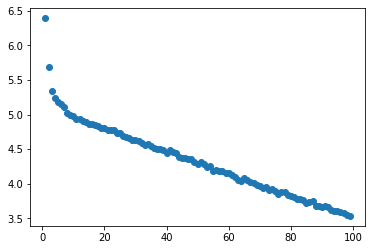

In [36]:
plt.scatter(df_dists['k'][:], df_dists['mean_dist'][:])

In [37]:
kclusters = 9
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_locations_vectors_values)

In [38]:
kmeans.labels_

array([7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 8, 7, 0, 4, 0, 0, 4, 4, 4, 7, 4, 4,
       7, 0, 0, 4, 7, 4, 7, 8, 0, 0, 4, 4, 5, 4, 4, 4, 4, 2, 4, 4, 5, 5,
       4, 4, 0, 2, 4, 5, 4, 5, 4, 2, 4, 0, 4, 0, 5, 0, 5, 4, 0, 4, 0, 2,
       0, 7, 6, 4, 4, 4, 5, 4, 5, 0, 7, 4, 8, 0, 4, 5, 6, 0, 7, 8, 4, 5,
       2, 8, 8, 0, 4, 2, 2, 5, 5, 5, 4, 5, 8, 4, 7, 2, 5, 0, 6, 5, 2, 0,
       5, 5, 5, 4, 2, 2, 2, 4, 4, 4, 2, 0, 2, 2, 8, 5, 2, 5, 6, 2, 5, 8,
       2, 2, 2, 4, 6, 6, 6, 5, 2, 5, 4, 5, 4, 2, 6, 2, 2, 6, 2, 6, 6, 2,
       6, 6, 6, 5, 2, 3, 2, 6, 5, 6, 2, 2, 5, 2, 2, 5, 6, 6, 5, 2, 6, 6,
       5, 2, 6, 6, 2, 3, 5, 6, 6, 6, 6, 6, 6, 3, 3, 6, 3, 6, 2, 6, 6, 6,
       6, 2, 6, 6, 2, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6,
       6, 5, 6, 5, 2, 2, 2, 3, 6, 6, 6, 6, 6, 6, 3, 3, 3, 6, 6, 6, 6, 2,
       6, 6, 2, 2, 3, 2, 6, 5, 6, 6, 6, 6, 3, 6, 6, 6, 3, 3, 6, 3, 3, 6,
       1, 3, 6, 3, 6, 6, 1, 3, 3, 6, 3, 3, 2, 3, 3, 3, 6, 3, 3, 3, 3, 3,
       2, 6, 3, 6, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3,

In [39]:
df_locations_vectors.insert(1, 'label', kmeans.labels_)

df_locations_clusters = pd.DataFrame()
df_locations_clusters['Location'] = df_locations_vectors['Location']
df_locations_clusters['labels'] = kmeans.labels_

In [40]:
df_locations_clusters['labels'].value_counts()

1    204
3    121
6     86
2     47
4     43
5     37
0     21
7     18
8      9
Name: labels, dtype: int64

In [41]:
df_locations_clusters

Location  labels
0    -23.5571076, -46.6595792       7
1    -23.5635646, -46.6857761       7
2    -23.6220184, -46.6952228       7
3    -23.5864339, -46.6737733       7
4    -23.5441938, -46.6595792       7
..                        ...     ...
581  -23.9223808, -46.7004499       1
582  -23.3681271, -46.5460142       1
583  -23.8641288, -46.7577856       1
584  -23.4303877, -46.6167058       1
585   -23.9098658, -46.693684       1

[586 rows x 2 columns]

In [42]:
clusters = df_locations_vectors.groupby('label').mean()
clusters

ATM  Acai House  Accessories Store  Adult Boutique  \
label                                                            
0      0.000000    0.190476           0.190476        0.047619   
1      0.000000    0.000000           0.004902        0.000000   
2      0.000000    0.042553           0.085106        0.000000   
3      0.008264    0.016529           0.008264        0.000000   
4      0.000000    0.162791           0.116279        0.000000   
5      0.000000    0.000000           0.081081        0.000000   
6      0.000000    0.046512           0.034884        0.000000   
7      0.000000    0.111111           0.277778        0.000000   
8      0.000000    0.000000           0.666667        0.000000   

       Advertising Agency  African Restaurant   Airport  Airport Food Court  \
label                                                                         
0                0.000000            0.000000  0.000000            0.000000   
1                0.004902            0.000000  0.000000            0.000000   
2                0.000000            0.021277  0.000000            0.000000   
3                0.000000            0.000000  0.000000            0.000000   
4                0.000000            0.000000  0.000000            0.000000   
5                0.000000            0.027027  0.081081            0.027027   
6                0.000000            0.000000  0.000000            0.000000   
7                0.000000            0.000000  0.166667            0.000000   
8                0.000000            0.000000  0.000000            0.000000   

       Airport Lounge  Airport Service  ...  Water Park  Waterfall  \
label                                   ...                          
0            0.000000         0.000000  ...    0.000000   0.000000   
1            0.000000         0.000000  ...    0.019608   0.009804   
2            0.000000         0.000000  ...    0.000000   0.000000   
3            0.000000         0.000000  ...    0.000000   0.000000   
4            0.023256         0.023256  ...    0.000000   0.000000   
5            0.081081         0.135135  ...    0.054054   0.000000   
6            0.000000         0.011628  ...    0.046512   0.000000   
7            0.000000         0.000000  ...    0.000000   0.000000   
8            0.000000         0.000000  ...    0.111111   0.000000   

       Whisky Bar  Wine Bar  Wine Shop  Wings Joint  Women's Store  \
label                                                                
0        0.000000  0.000000   0.095238     0.095238       0.142857   
1        0.000000  0.000000   0.014706     0.004902       0.004902   
2        0.000000  0.021277   0.042553     0.021277       0.148936   
3        0.000000  0.008264   0.024793     0.016529       0.041322   
4        0.023256  0.116279   0.139535     0.000000       0.162791   
5        0.054054  0.054054   0.081081     0.027027       0.243243   
6        0.000000  0.023256   0.069767     0.023256       0.034884   
7        0.000000  0.111111   0.333333     0.000000       0.611111   
8        0.000000  0.000000   0.000000     0.000000       0.222222   

       Yoga Studio       Zoo  Zoo Exhibit  
label                                      
0         0.142857  0.000000     0.047619  
1         0.000000  0.009804     0.004902  
2         0.042553  0.000000     0.000000  
3         0.008264  0.000000     0.008264  
4         0.186047  0.000000     0.000000  
5         0.027027  0.000000     0.027027  
6         0.034884  0.011628     0.000000  
7         0.500000  0.000000     0.000000  
8         0.000000  0.000000     0.000000  

[9 rows x 468 columns]

In [43]:
clusters_suitability = clusters[venue_category].sort_values(ascending=False)
best_cluster = clusters_suitability.index[0]
print(clusters_suitability)
print(best_cluster)

label
7    0.666667
4    0.604651
5    0.540541
8    0.222222
0    0.142857
2    0.085106
3    0.057851
6    0.034884
1    0.004902
Name: Theater, dtype: float64
7


In [44]:
df_best_cluster = df_locations_vectors.loc[df_locations_vectors['label'] == best_cluster].reset_index(drop=True)
df_best_cluster = df_best_cluster.sort_values(venue_category, ascending=False).reset_index(drop=True)
df_best_cluster

Location  label  ATM  Acai House  Accessories Store  \
0   -23.5447974, -46.6455369      7  0.0         0.0                0.0   
1   -23.6220184, -46.6952228      7  0.0         0.0                0.0   
2   -23.5758782, -46.6429499      7  0.0         1.0                1.0   
3   -23.5571076, -46.6595792      7  0.0         0.0                1.0   
4   -23.5441938, -46.6595792      7  0.0         0.0                0.0   
5   -23.5685423, -46.6535779      7  0.0         0.0                0.0   
6   -23.5881251, -46.6894668      7  0.0         0.0                1.0   
7   -23.5757279, -46.6811631      7  0.0         0.0                0.0   
8   -23.5950603, -46.6640361      7  0.0         0.0                0.0   
9   -23.6300928, -46.5823281      7  0.0         0.0                0.0   
10  -23.6281302, -46.7085115      7  0.0         0.0                0.0   
11  -23.5699129, -46.6689758      7  0.0         0.0                0.0   
12  -23.5573121, -46.6733017      7  0.0         0.0                1.0   
13     -23.5764635, -46.6957      7  0.0         0.0                1.0   
14  -23.5983465, -46.6810782      7  0.0         1.0                0.0   
15  -23.5635646, -46.6857761      7  0.0         0.0                0.0   
16  -23.5864339, -46.6737733      7  0.0         0.0                0.0   
17  -23.5103177, -46.6367245      7  0.0         0.0                0.0   

    Adult Boutique  Advertising Agency  African Restaurant  Airport  \
0              0.0                 0.0                 0.0      0.0   
1              0.0                 0.0                 0.0      0.0   
2              0.0                 0.0                 0.0      0.0   
3              0.0                 0.0                 0.0      0.0   
4              0.0                 0.0                 0.0      0.0   
5              0.0                 0.0                 0.0      0.0   
6              0.0                 0.0                 0.0      0.0   
7              0.0                 0.0                 0.0      0.0   
8              0.0                 0.0                 0.0      0.0   
9              0.0                 0.0                 0.0      0.0   
10             0.0                 0.0                 0.0      0.0   
11             0.0                 0.0                 0.0      0.0   
12             0.0                 0.0                 0.0      0.0   
13             0.0                 0.0                 0.0      0.0   
14             0.0                 0.0                 0.0      0.0   
15             0.0                 0.0                 0.0      0.0   
16             0.0                 0.0                 0.0      0.0   
17             0.0                 0.0                 0.0      3.0   

    Airport Food Court  ...  Water Park  Waterfall  Whisky Bar  Wine Bar  \
0                  0.0  ...         0.0        0.0         0.0       0.0   
1                  0.0  ...         0.0        0.0         0.0       0.0   
2                  0.0  ...         0.0        0.0         0.0       0.0   
3                  0.0  ...         0.0        0.0         0.0       0.0   
4                  0.0  ...         0.0        0.0         0.0       0.0   
5                  0.0  ...         0.0        0.0         0.0       0.0   
6                  0.0  ...         0.0        0.0         0.0       0.0   
7                  0.0  ...         0.0        0.0         0.0       0.0   
8                  0.0  ...         0.0        0.0         0.0       0.0   
9                  0.0  ...         0.0        0.0         0.0       0.0   
10                 0.0  ...         0.0        0.0         0.0       0.0   
11                 0.0  ...         0.0        0.0         0.0       0.0   
12                 0.0  ...         0.0        0.0         0.0       0.0   
13                 0.0  ...         0.0        0.0         0.0       0.0   
14                 0.0  ...         0.0        0.0         0.0       0.0   
15                 0.0  ... 

In [45]:
weight_div = 1 / df_best_cluster.shape[0]
weights = []
count = df_best_cluster.shape[0]
for i in df_best_cluster[venue_category]:
    w = weight_div * count
    weights.append(w)
    count -= 1

mean = (df_best_cluster[venue_category] * weights).sum() / sum(weights)
mean

1.08187134502924

In [59]:
best_locations = df_best_cluster.loc[(df_best_cluster[venue_category] < mean) | (df_best_cluster[venue_category] == mean)]
best_locations = best_locations.sort_values(venue_category).reset_index(drop=True)
best_locations = best_locations[['Location', venue_category]]
best_locations

Location  Theater
0   -23.5950603, -46.6640361      0.0
1   -23.6300928, -46.5823281      0.0
2   -23.6281302, -46.7085115      0.0
3   -23.5699129, -46.6689758      0.0
4   -23.5573121, -46.6733017      0.0
5      -23.5764635, -46.6957      0.0
6   -23.5983465, -46.6810782      0.0
7   -23.5635646, -46.6857761      0.0
8   -23.5864339, -46.6737733      0.0
9   -23.5103177, -46.6367245      0.0
10  -23.5571076, -46.6595792      1.0
11  -23.5441938, -46.6595792      1.0
12  -23.5685423, -46.6535779      1.0
13  -23.5881251, -46.6894668      1.0
14  -23.5757279, -46.6811631      1.0

In [60]:
best_locations['supported {} quantity'.format(venue_category)] = round(mean - best_locations[venue_category])
best_locations = best_locations[['Location', 'supported {} quantity'.format(venue_category)]]
best_locations = best_locations.loc[best_locations['supported {} quantity'.format(venue_category)] > 0]
best_locations

Location  supported Theater quantity
0  -23.5950603, -46.6640361                         1.0
1  -23.6300928, -46.5823281                         1.0
2  -23.6281302, -46.7085115                         1.0
3  -23.5699129, -46.6689758                         1.0
4  -23.5573121, -46.6733017                         1.0
5     -23.5764635, -46.6957                         1.0
6  -23.5983465, -46.6810782                         1.0
7  -23.5635646, -46.6857761                         1.0
8  -23.5864339, -46.6737733                         1.0
9  -23.5103177, -46.6367245                         1.0

In [61]:
best_number = best_locations.iloc[0]['supported {} quantity'.format(venue_category)]
best_locations_0 = best_locations.loc[best_locations['supported {} quantity'.format(venue_category)] == best_number]
best_locations_0

Location  supported Theater quantity
0  -23.5950603, -46.6640361                         1.0
1  -23.6300928, -46.5823281                         1.0
2  -23.6281302, -46.7085115                         1.0
3  -23.5699129, -46.6689758                         1.0
4  -23.5573121, -46.6733017                         1.0
5     -23.5764635, -46.6957                         1.0
6  -23.5983465, -46.6810782                         1.0
7  -23.5635646, -46.6857761                         1.0
8  -23.5864339, -46.6737733                         1.0
9  -23.5103177, -46.6367245                         1.0

In [62]:
d_map = folium.Map(location=city_coordinates, zoom_start=11)

In [63]:
coordinates_marks = folium.map.FeatureGroup()

for loc in best_locations_0['Location']:
    coordinates_marks.add_child(folium.features.Circle(location=loc.split(', '), radius=1000, color='red'))

for loc in best_locations.iloc[(best_locations_0.index[-1] + 1):]['Location']:
    coordinates_marks.add_child(folium.features.Circle(location=loc.split(', '), radius=1000, color='blue'))

d_map.add_child(coordinates_marks)